In [42]:

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

TOOL_COLOR = {
    "COTAN": "#66c2a5", 
    "seurat": "#fc8d62", 
    "scanpy": "#8da0cb", 
    "monocle": "#e78ac3", 
    "scvi-tools": "#a6d854"
}

TOOL_TAGS = {
	'COTAN': 'COTAN',
	'seurat': 'Seurat',
	'scanpy': 'Scanpy',
	'monocle':'Monocle',
	'scvi-tools': 'scVI-tools',
}

DATASETS_NAMES = {
	'tabula-muris-heart': 'tabula muris heart',
	'tabula-muris-marrow_P7_3': 'tabula muris marrow',
	'peripheal-blood': 'PBMC TotalSeq',
	'zheng-4': 'zheng 4',
	'zheng-8': 'zheng 8'
}

DATASET_TAGS = ['tabula-muris-heart', 'tabula-muris-marrow_P7_3', 'peripheal-blood', 'zheng-4', 'zheng-8']
N_MARKERS = 50

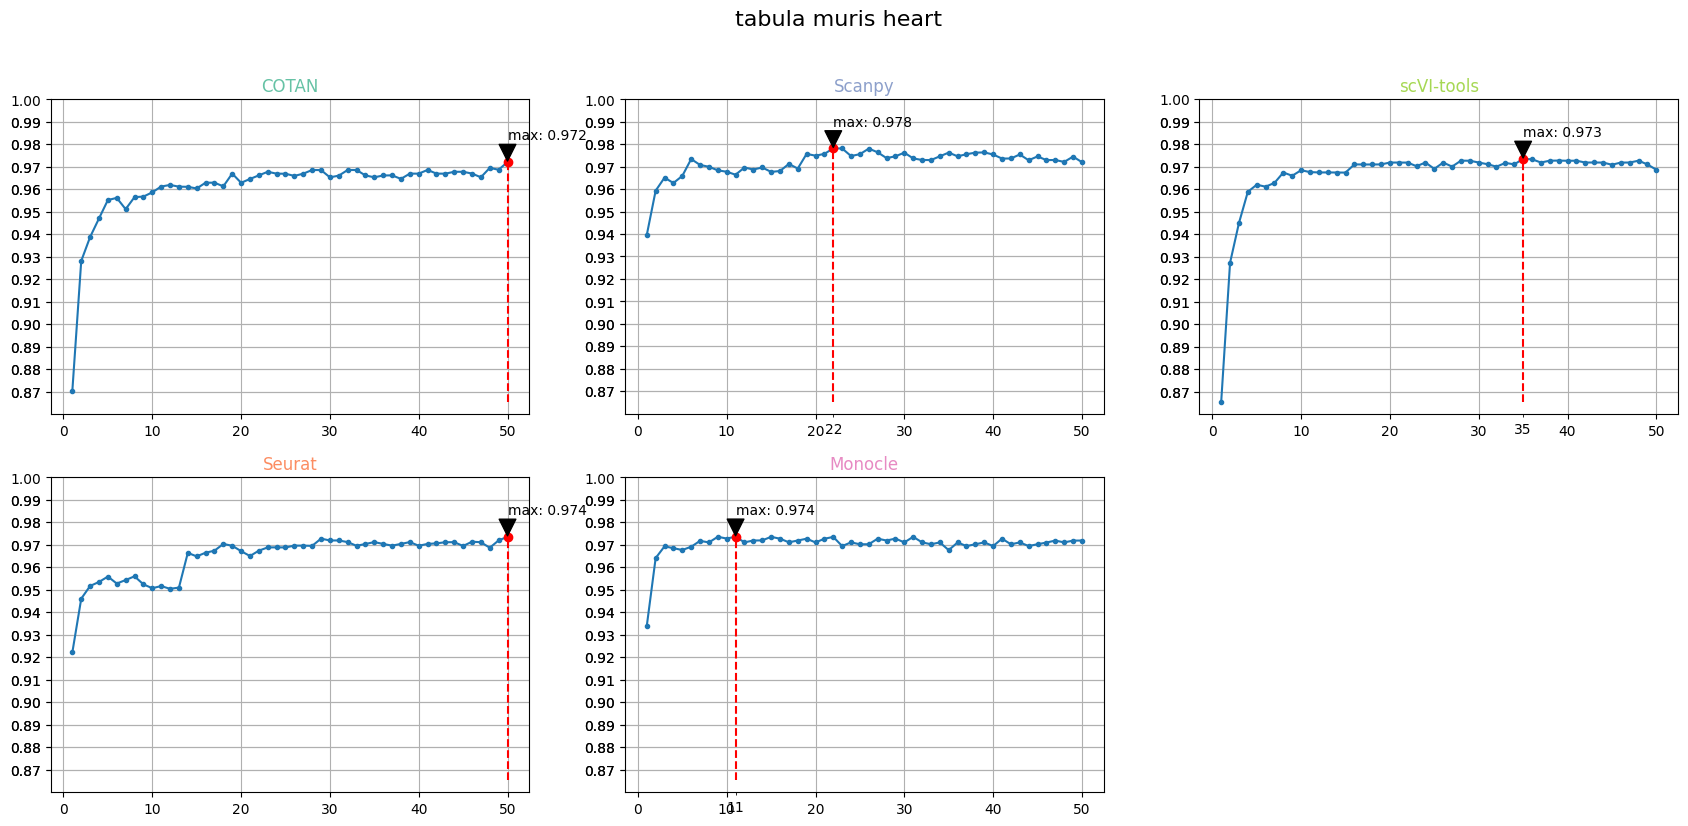

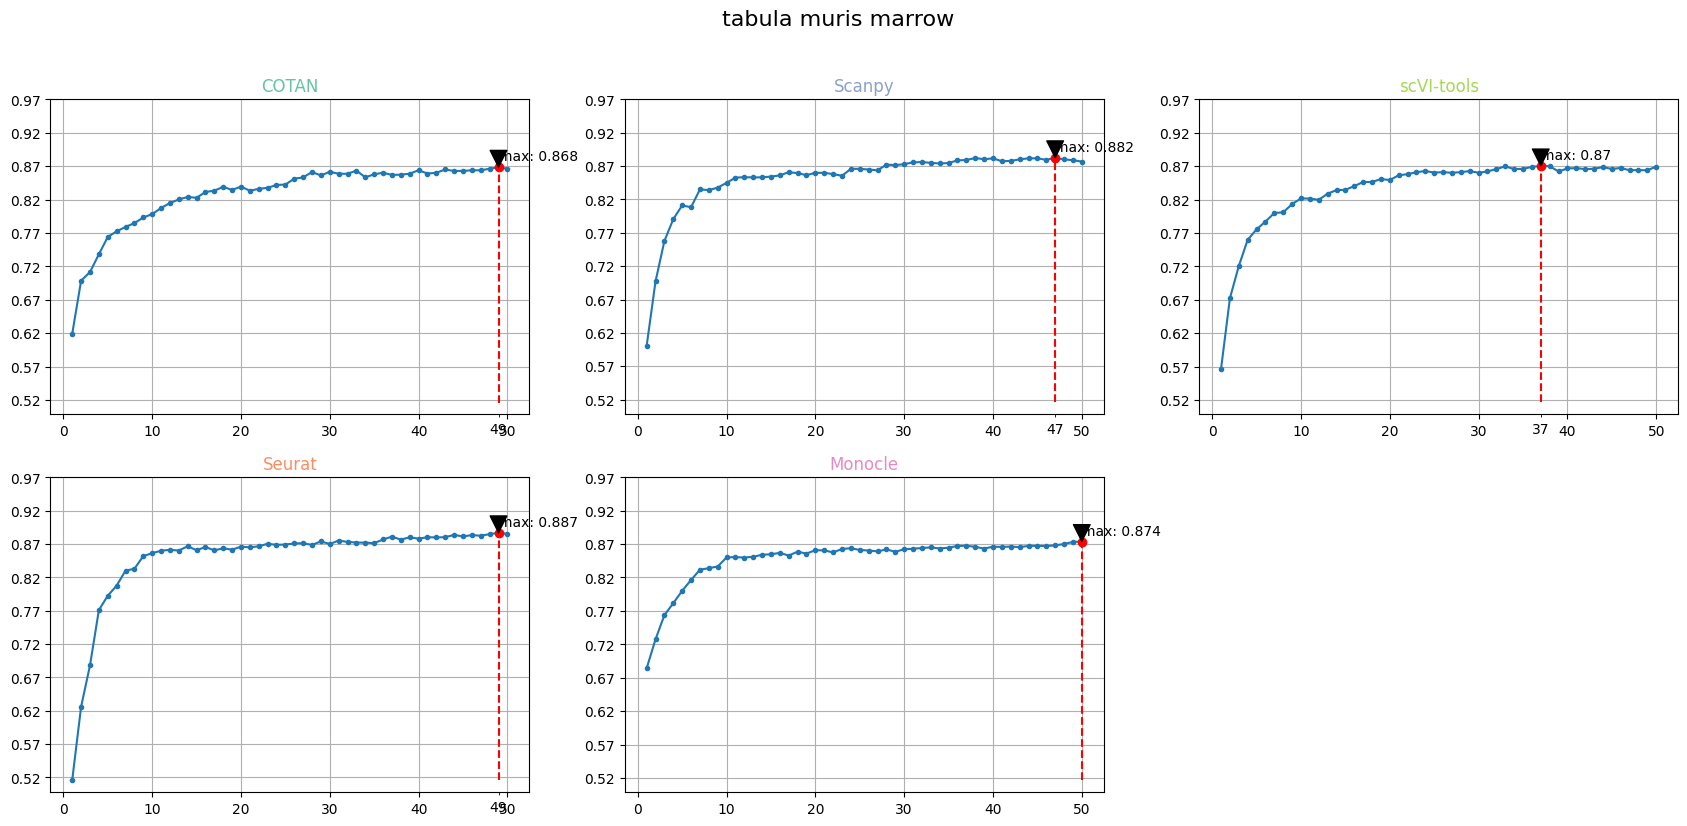

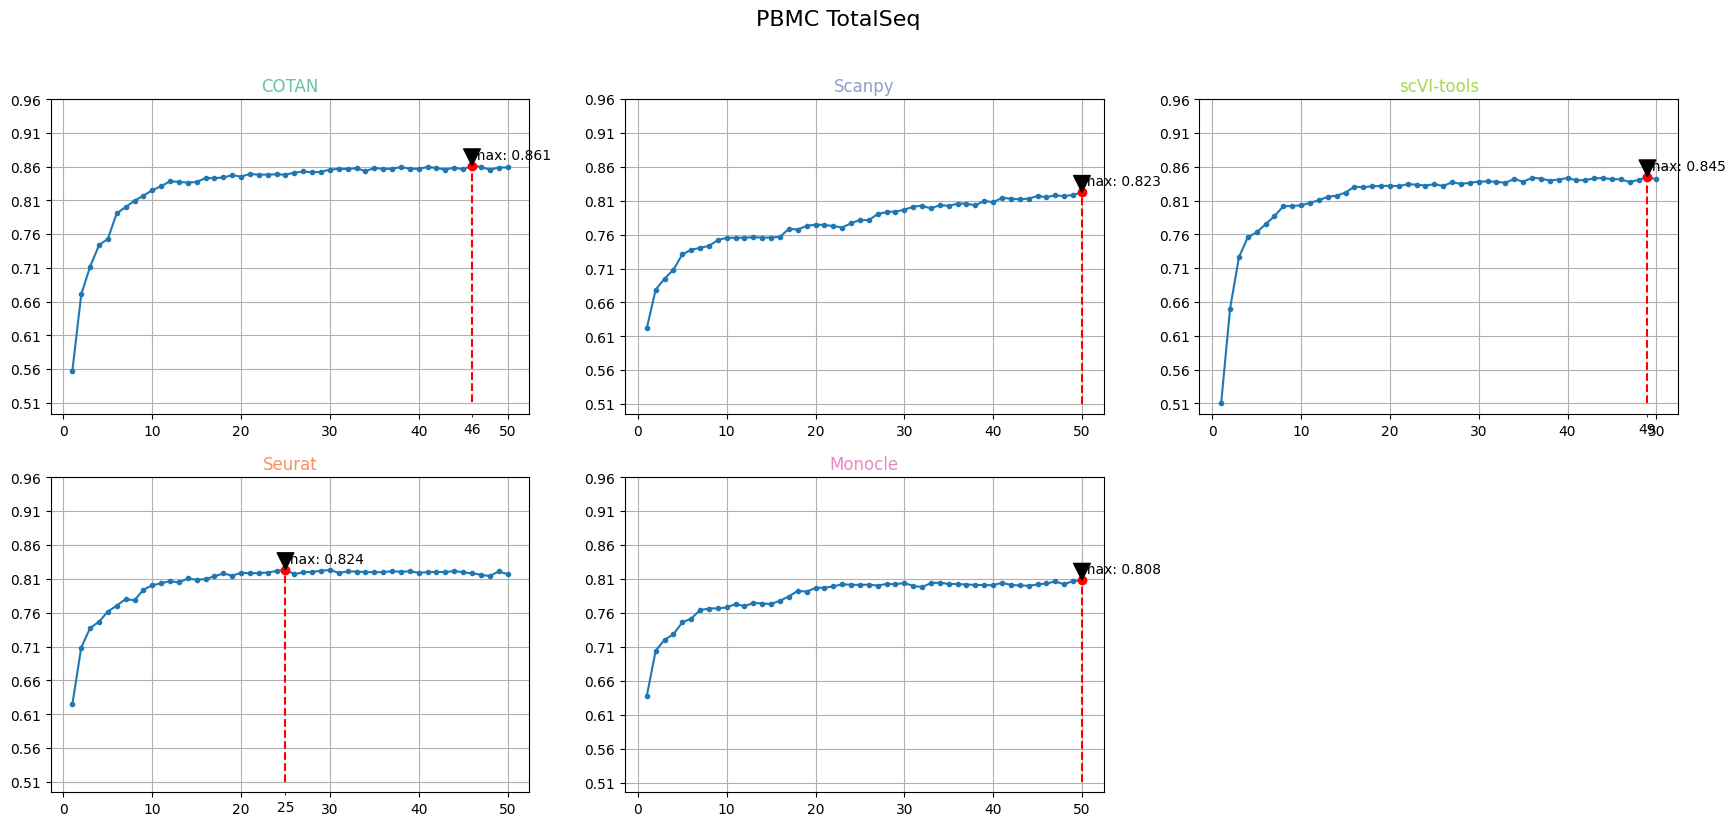

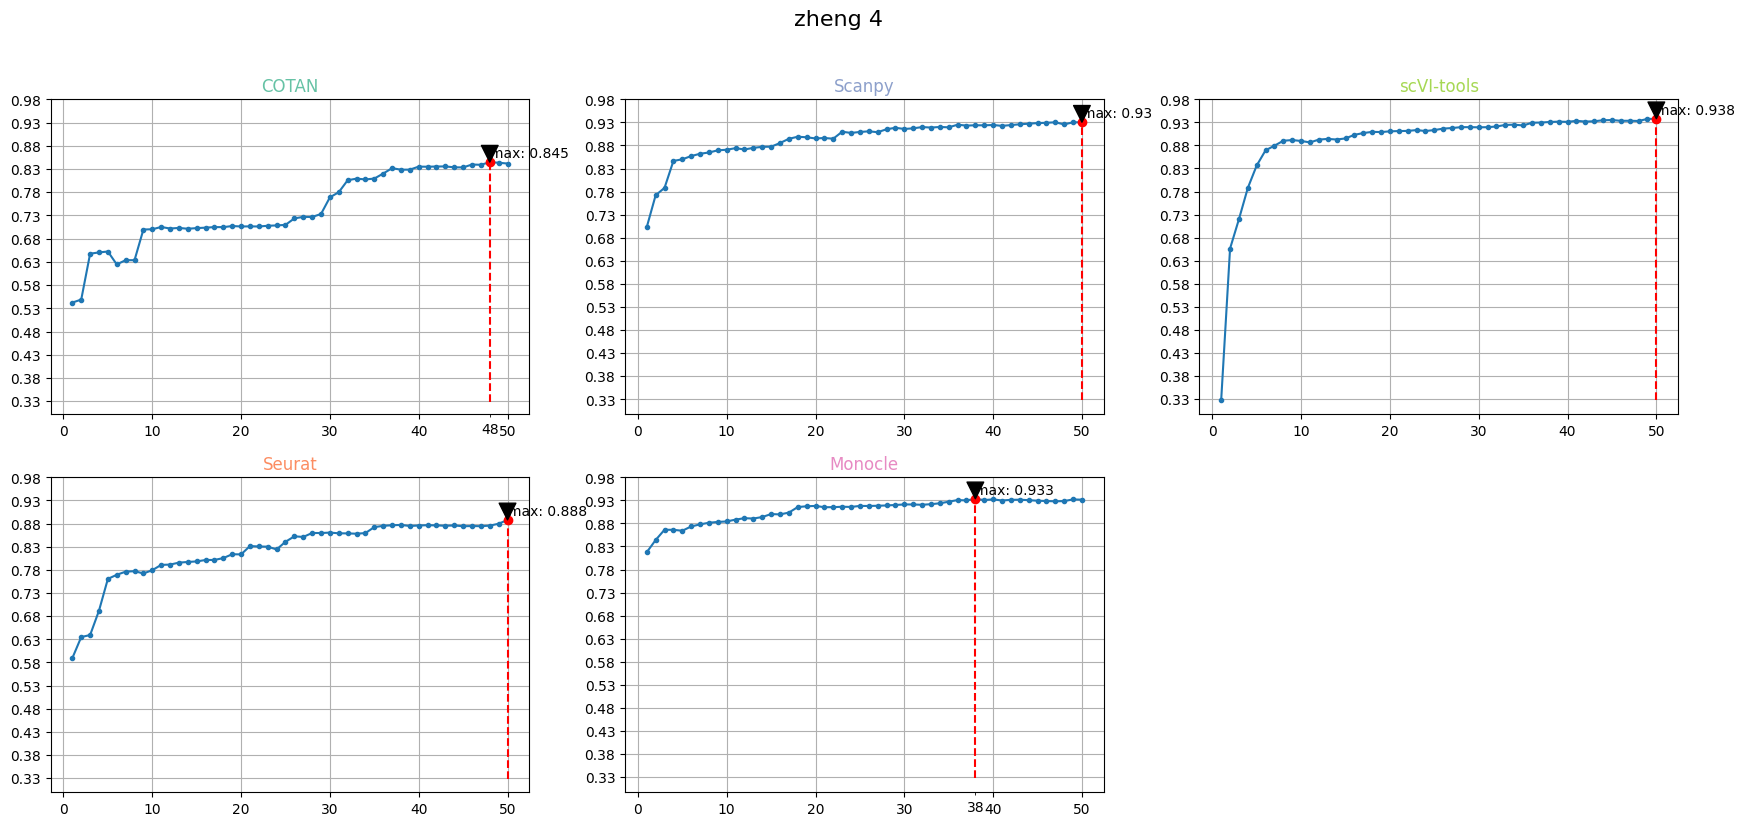

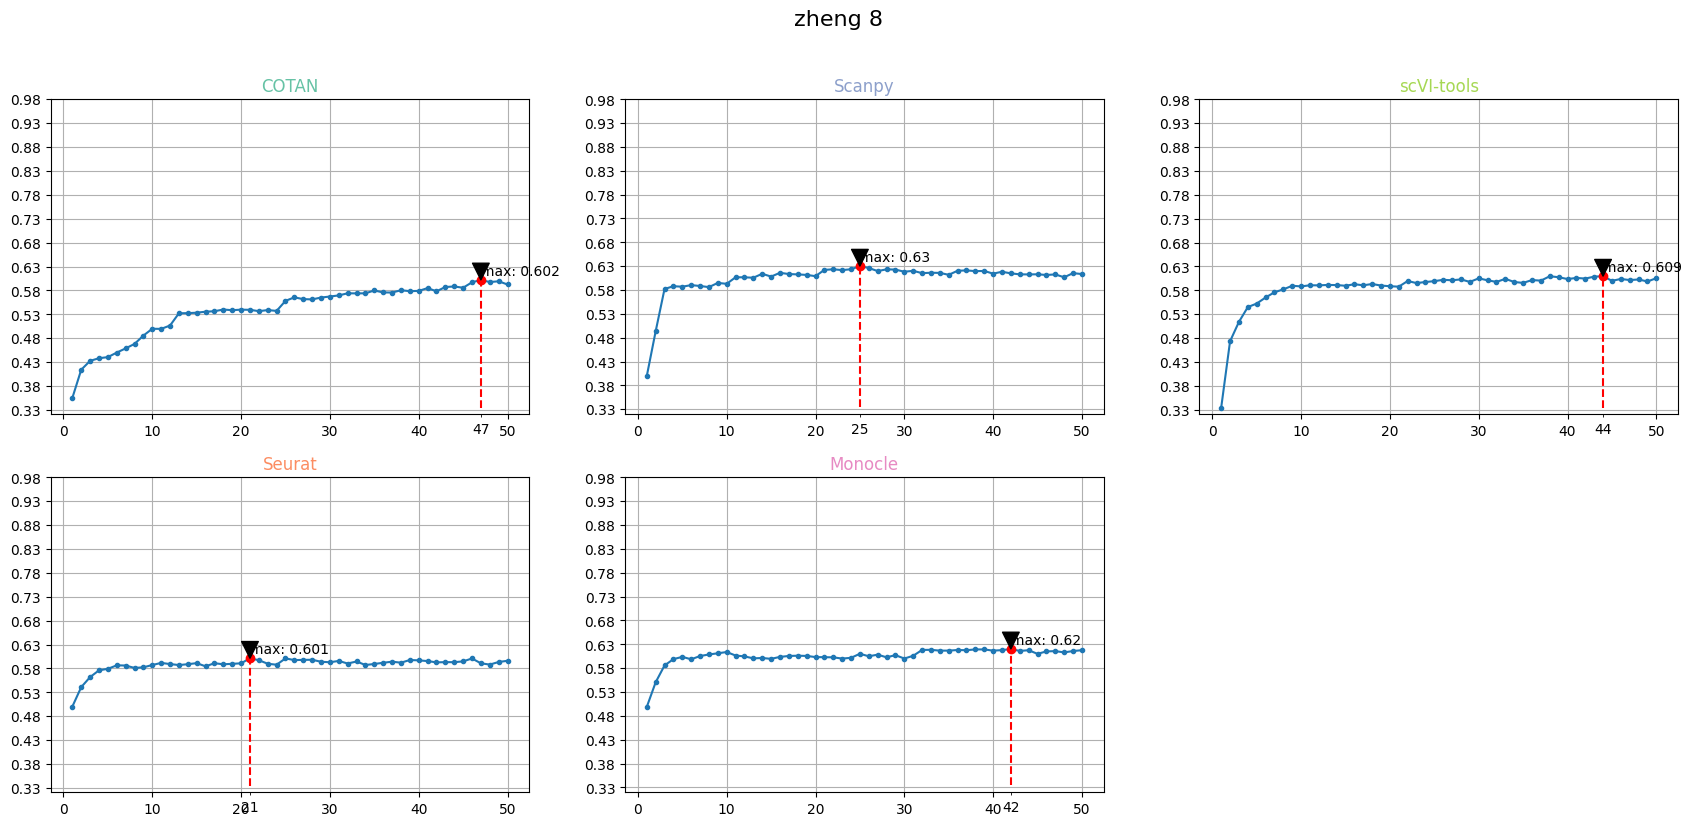

In [43]:
for dataset in DATASET_TAGS:
	scores_path = './results/{}/clf_scores.pickle'.format(dataset)
	if not os.path.exists(scores_path): continue
	with open(scores_path, 'rb') as handle:
		scores = pickle.load(handle)
	
	# reorder tools to match the order in TOOL_TAGS
	scores = {tool: scores[tool] for tool in TOOL_TAGS.keys()}
 
	tools = scores.keys()
	fig, ax = plt.subplots(2, 3, figsize=(21, 9))
	fig.suptitle(DATASETS_NAMES[dataset], fontsize=16)
	min_val = np.min([np.min(scores[tool]['mean']) for tool in tools])
	max_val = np.max([np.max(scores[tool]['mean']) for tool in tools])
	for j, tool in enumerate(tools): 
		i = 1-j%2 if j< 5 else 2			
		i = 0 if i == 1 else 1
		max_i = np.argmax(scores[tool]['mean'])
		ax[i%2, j//2].plot([i for i in range(1, N_MARKERS+1)], scores[tool]['mean'], marker='.')
		
		# print max max in red
		ax[i%2, j//2].plot([max_i+1], [scores[tool]['mean'][max_i]], marker='o', color='red')
		
		# annotation for max
		ax[i%2, j//2].annotate('max: {}'.format(round(scores[tool]['mean'][max_i], 3)), xy=(max_i+1, scores[tool]['mean'][max_i]), xytext=(max_i+1, scores[tool]['mean'][max_i]+0.01), arrowprops=dict(facecolor='black', shrink=0.05))
		
		# annotation for second max
		
		# Only last two plots have x label (it's the same for all)
		if (i>1):
			ax[i%2, j//2].set_ylabel("f1 weighted")
			ax[i%2, j//2].set_xlabel("# features")
		# print x tick for max 
		ax[i%2, j//2].plot([max_i+1, max_i+1], [min_val, scores[tool]['mean'][max_i]], linestyle='--', color='red')
		ax[i%2, j//2].set_xticks([max_i+1], [max_i+1], minor=True)
		# Same scale for all plots
		ax[i%2, j//2].set_yticks([round(i, 2) for i in np.arange(min_val, 1, (0.005 if min_val > 0.85 else 0.05))])
		# Set title
		ax[i%2, j//2].set_title(TOOL_TAGS[tool], color=TOOL_COLOR[tool])
		ax[i%2, j//2].grid()
	ax[1, 2].set_visible(False)
	plt.savefig('./results/{}/clf_plots.eps'.format(dataset))
	plt.savefig('./results/{}/clf_plots.png'.format(dataset))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9611090648218525 0.9611090648218525 (0, '') (0, '')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8308617023291021 0.8040992717756261 (0.9611090648218525, 'tabula-muris-heart') (0.8284944171559129, 'tabula-muris-marrow_P7_3')
0.8308617023291021 0.776462022534006 (0.8308617023291021, 'peripheal-blood') (0.8284944171559129, 'tabula-muris-marrow_P7_3')
0.8308617023291021 0.7845643959823634 (0.8308617023291021, 'peripheal-blood') (0.8284944171559129, 'tabula-muris-marrow_P7_3')
0.8308617023291021 0.8152954061391162 (0.8308617023291021, 'peripheal-blood') (0.8284944171559129, 'tabula-muris-marrow_P7_3')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Best for COTAN: (0.8308617023291021, 'peripheal-blood')
Worst for COTAN: (0.5387581608071428, 'zheng-8')


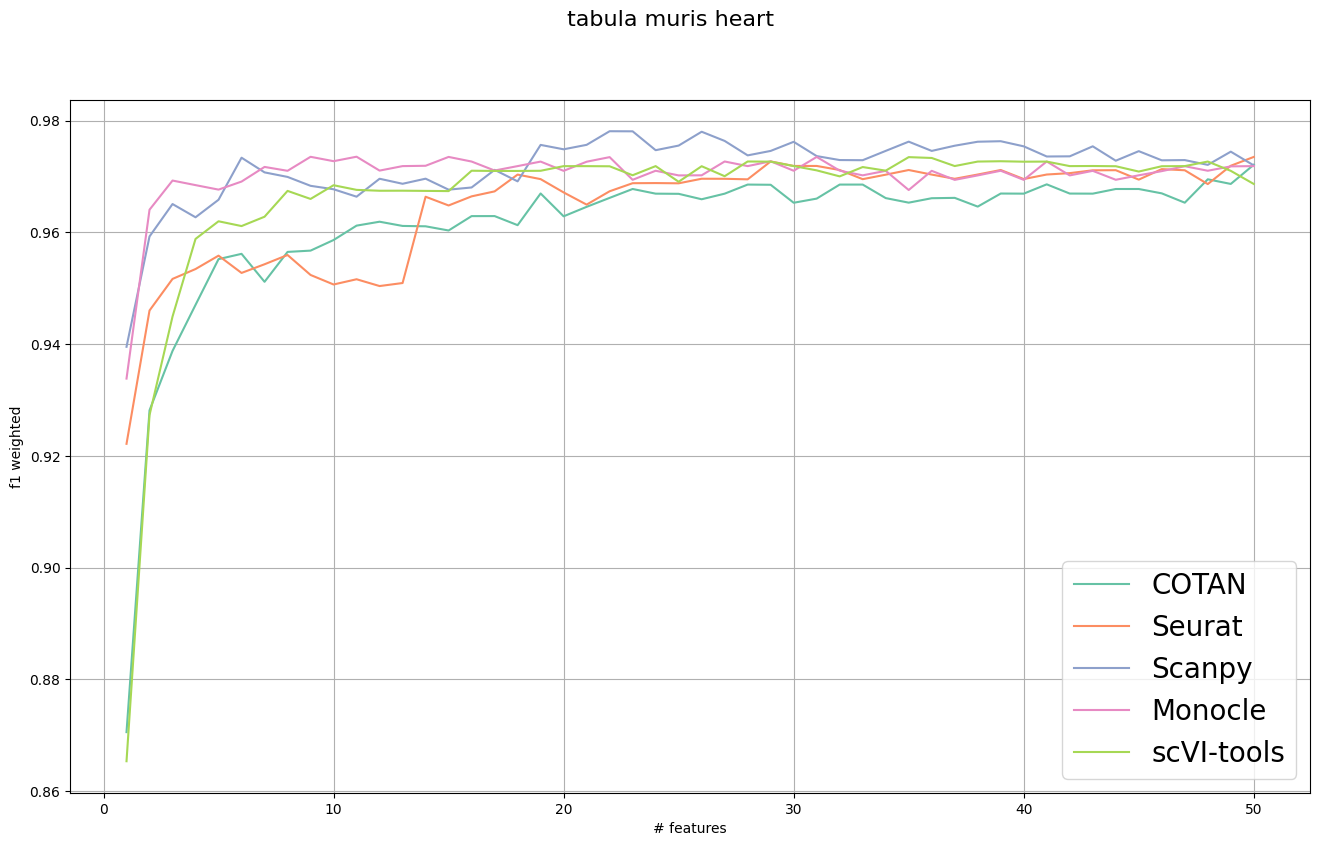

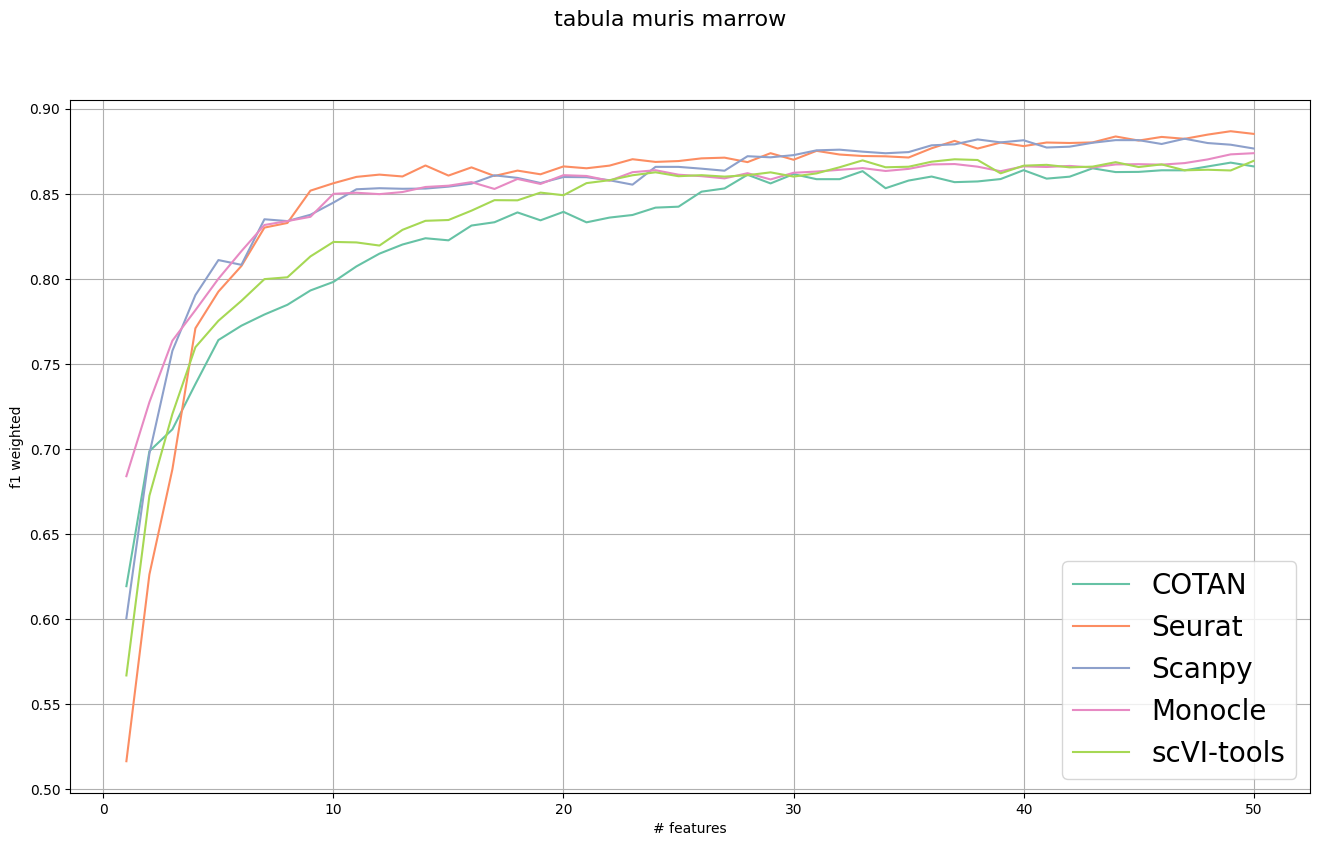

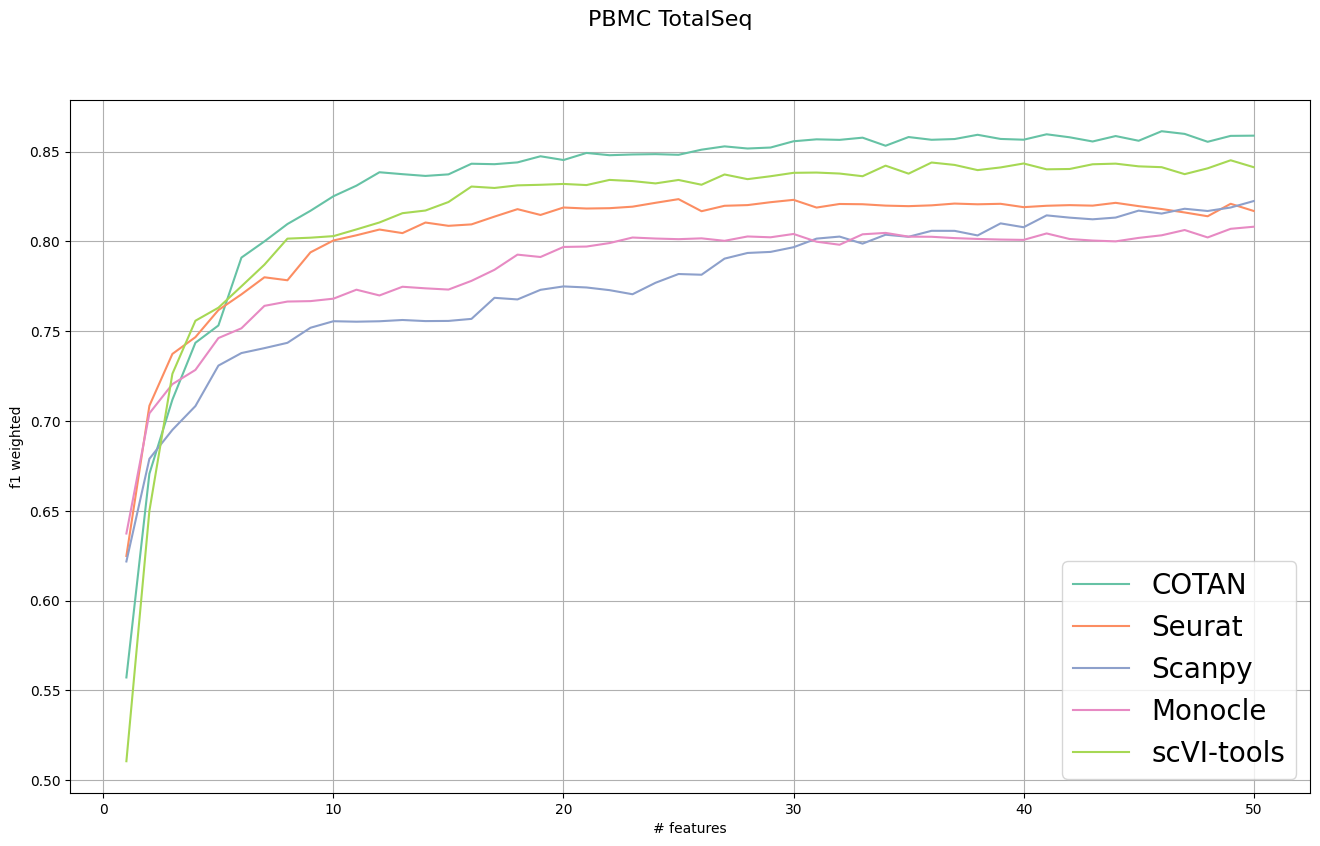

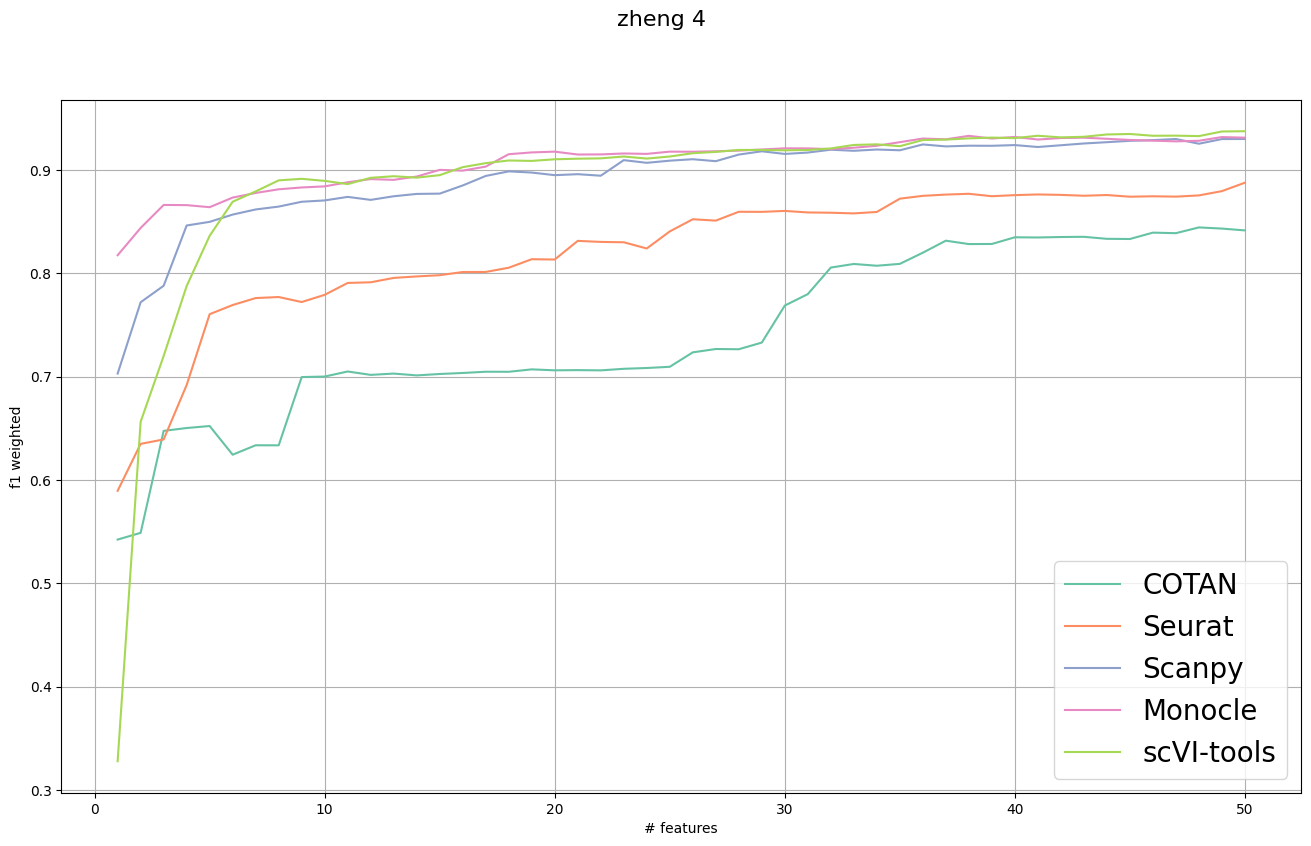

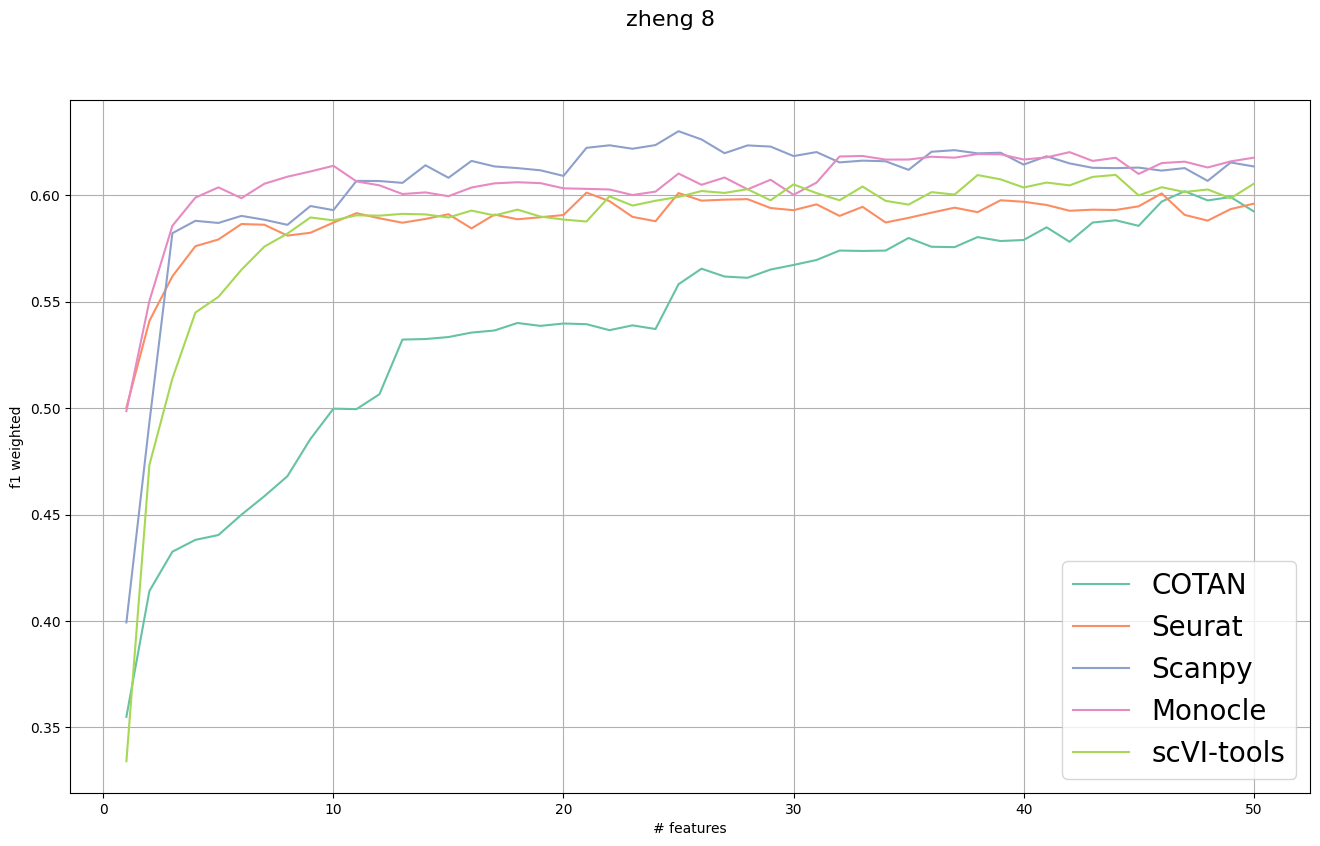

In [44]:

best_for_COTAN = (0, '')
worst_for_COTAN = (0, '')
for dataset in DATASET_TAGS:
    scores_path = './results/{}/clf_scores.pickle'.format(dataset)
    with open(scores_path, 'rb') as handle:
        scores = pickle.load(handle)
    scores = {tool: scores[tool] for tool in TOOL_TAGS.keys()}
    tools = scores.keys()
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))
    fig.suptitle(DATASETS_NAMES[dataset], fontsize=16)
    for j, tool in enumerate(tools):
        ax.plot([i for i in range(1, N_MARKERS+1)], scores[tool]['mean'], color=TOOL_COLOR[tool], label=TOOL_TAGS[tool])
        
        # dataset where COTAN on average is the best compared to other tools
        if best_for_COTAN == (0, '') or np.average(scores['COTAN']['mean']) > np.average(scores[tool]['mean']):
            print(np.average(scores['COTAN']['mean'], axis=0), np.average(scores[tool]['mean']), best_for_COTAN, worst_for_COTAN)
            best_for_COTAN = (np.average(scores['COTAN']['mean']), dataset)
        # dataset where COTAN on average is the worst compared to other tools
        if worst_for_COTAN == (0, '') or np.average(scores['COTAN']['mean']) < np.average(scores[tool]['mean']):
            worst_for_COTAN = (np.average(scores['COTAN']['mean']), dataset)
    ax.set_ylabel("f1 weighted")
    ax.set_xlabel("# features")
    # ax.set_yticks([round(i, 2) for i in np.arange(min_all[dataset], max_all[dataset], (0.005 if min_val > 0.9 else 0.05))])
    ax.legend(fontsize='20')
    # handles, labels = plt.gca().get_legend_handles_labels()
    # ax.legend([handles[order.index(index)] for index in order],[labels[labels.index(index)] for index in order], fontsize='20')
    ax.grid()
    
    plt.savefig('./results/{}/clf_ALL.eps'.format(dataset))
    plt.savefig('./results/{}/clf_ALL.png'.format(dataset))



print("Best for COTAN: {}".format(best_for_COTAN))
print("Worst for COTAN: {}".format(worst_for_COTAN))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


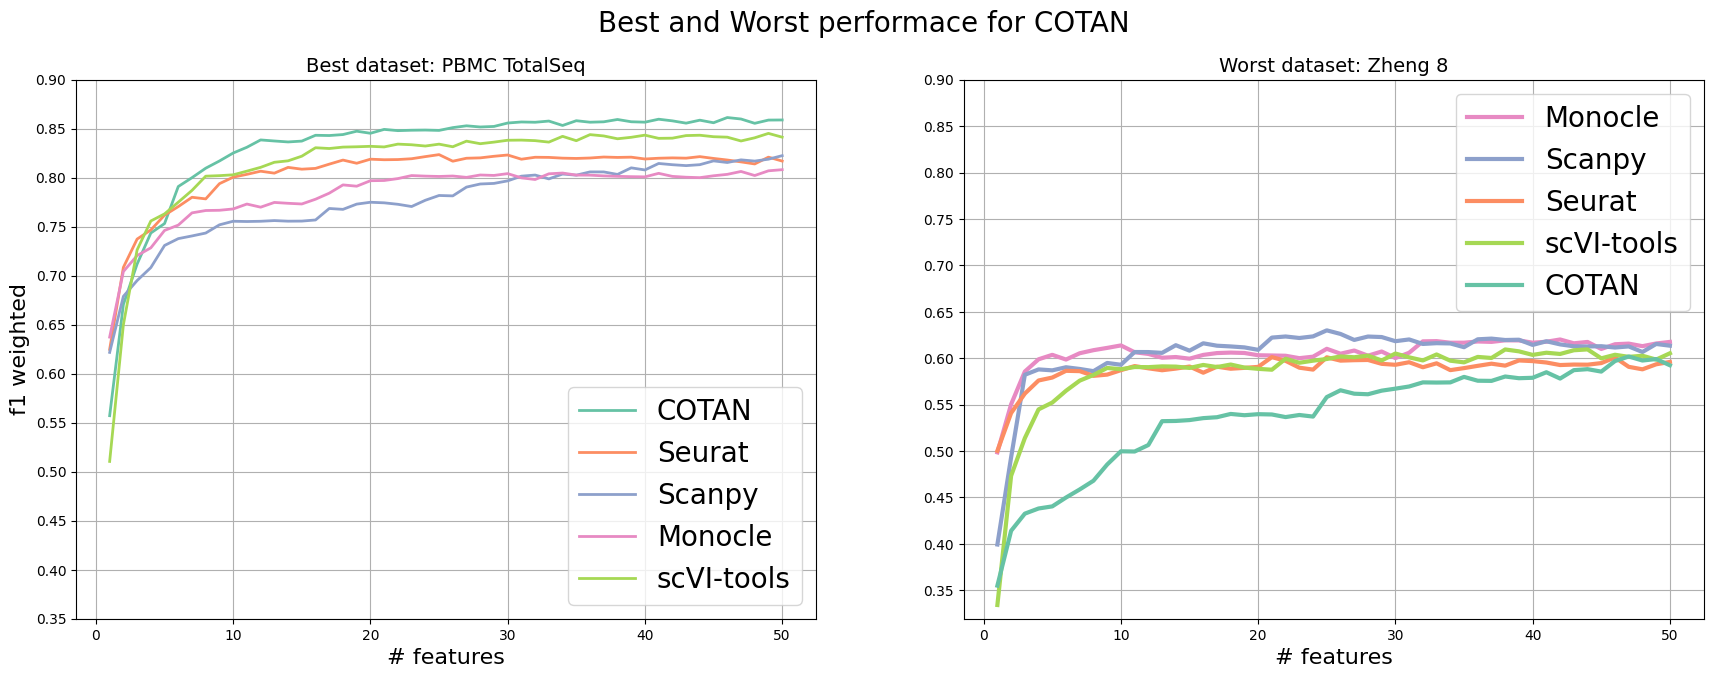

In [47]:
first_dataset = best_for_COTAN[1]
scores_path = './results/{}/clf_scores.pickle'.format(first_dataset)
with open(scores_path, 'rb') as handle:
    scores = pickle.load(handle)
scores = {tool: scores[tool] for tool in TOOL_TAGS.keys()}

tools = scores.keys()
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Best and Worst performace for COTAN', fontsize=20)

for j, tool in enumerate(tools):
    ax[0].plot([i for i in range(1, N_MARKERS+1)], scores[tool]['mean'], color=TOOL_COLOR[tool], label=TOOL_TAGS[tool], linewidth=2)

handles, labels = plt.gca().get_legend_handles_labels()
ax[0].set_title('Best dataset: {}'.format(('PBMC TotalSeq'if first_dataset=='peripheal-blood' else first_dataset)), fontsize='14')
ax[0].set_ylabel("f1 weighted", fontsize='16')
ax[0].set_xlabel("# features", fontsize='16')
ax[0].grid()
ax[0].legend(fontsize='20')
# ax[0].set_yscale('log')
ax[0].set_yticks([round(i, 2) for i in np.arange(0.35, 0.95, 0.05)])

second_dataset = worst_for_COTAN[1]
scores_path = './results/{}/clf_scores.pickle'.format(second_dataset)
with open(scores_path, 'rb') as handle:
    scores = pickle.load(handle)
tools = scores.keys()

for j, tool in enumerate(tools):
    ax[1].plot([i for i in range(1, N_MARKERS+1)], scores[tool]['mean'], color=TOOL_COLOR[tool], label=TOOL_TAGS[tool], linewidth=3)
handles, labels = plt.gca().get_legend_handles_labels()
ax[1].set_title('Worst dataset: {}'.format(second_dataset.replace('-', ' ').title()), fontsize='14')
ax[1].set_xlabel("# features", fontsize='16')
ax[1].grid()
ax[1].legend(fontsize='20')
ax[1].set_yticks([round(i, 2) for i in np.arange(0.35, 0.95, 0.05)])

    
plt.savefig('./results/clf_COTAN_bestwors.eps')
plt.savefig('./results/clf_COTAN_bestwors.png')